In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
import pandas as pd
from importlib import reload
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
from os import getcwd

In [37]:
import utils
reload(utils)

<module 'utils' from 'C:\\Users\\Smit\\ds5230_2020_project\\utils.py'>

In [17]:
PROJECT_PATH = getcwd()
PICKLE_PATH = PROJECT_PATH + "\\pickles\\"

# Reading styles file containing information like apparel categories and sub-categories of images

In [18]:
styles = pd.read_csv('styles.csv', error_bad_lines = False)
styles.head()

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


### Category distribution in the dataset

Apparel           21397
Accessories       11274
Footwear           9219
Personal Care      2403
Free Items          105
Sporting Goods       25
Home                  1
Name: masterCategory, dtype: int64


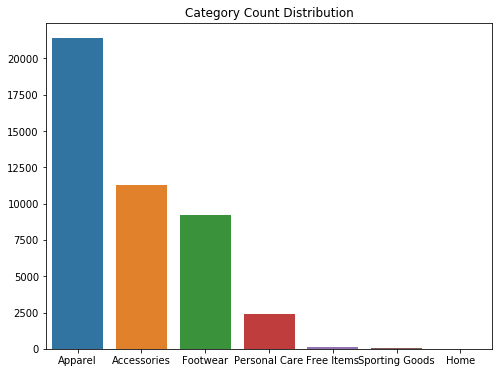

In [19]:
categories = styles['masterCategory'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=[name for name in categories.index], y = [cnt for cnt in categories])
plt.title("Category Count Distribution")
print(categories)
del categories

### Sub-Category Distribution

              sub_categories  count     %total
0                    Topwear  15402  34.670448
1                      Shoes   7343  16.529354
2                       Bags   3055   6.876913
3                 Bottomwear   2694   6.064290
4                    Watches   2542   5.722132
5                  Innerwear   1808   4.069872
6                  Jewellery   1079   2.428867
7                    Eyewear   1073   2.415361
8                  Fragrance   1011   2.275797
9                     Sandal    963   2.167747
10                   Wallets    933   2.100216
11                Flip Flops    913   2.055195
12                     Belts    811   1.825590
13                     Socks    698   1.571223
14                      Lips    527   1.186296
15                     Dress    478   1.075995
16  Loungewear and Nightwear    470   1.057987
17                     Saree    427   0.961192
18                     Nails    329   0.740591
19                    Makeup    307   0.691068
20           

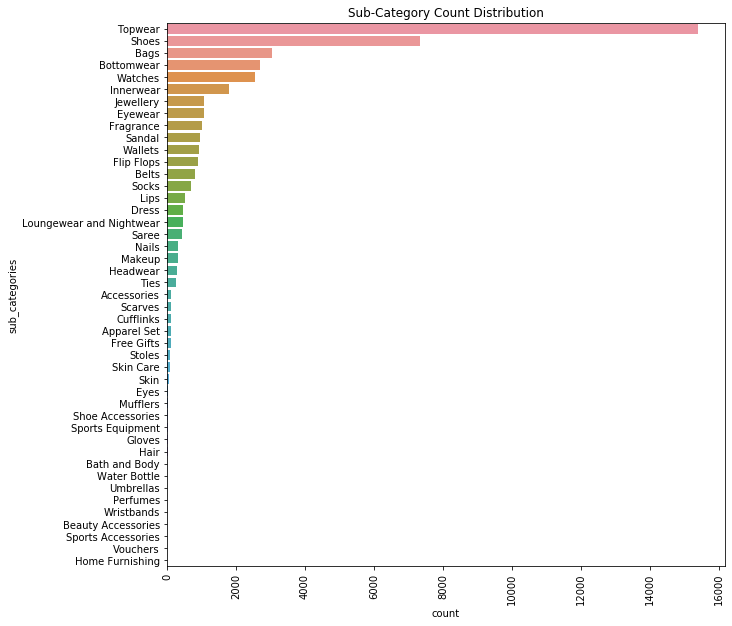

In [20]:
sub_categories = styles['subCategory'].value_counts().rename_axis('sub_categories').reset_index(name='count')
plt.figure(figsize=(10,10))
sns.barplot(y=sub_categories['sub_categories'], x = sub_categories['count'])
plt.title("Sub-Category Count Distribution")
plt.xticks(rotation=90)
sub_categories['%total'] = (sub_categories['count']*100)/sub_categories['count'].sum() 
print(sub_categories)

# Random sampling picking equal count of major subcategories 

In [21]:
MIN_COUNT = 900

In [22]:
sampled_categories = list(sub_categories[sub_categories['count'] >= MIN_COUNT]['sub_categories'])
print("Total categories: ", len(sampled_categories))
sampled_styles = styles[styles['subCategory'].isin(sampled_categories)].reset_index(drop=True)
sampled_styles = sampled_styles.groupby('subCategory').apply(lambda x: x.sample(n = MIN_COUNT, 
                                                                                random_state = 99)).reset_index(drop = True)
print(sampled_styles['subCategory'].value_counts())
print("\n")
print("Total sampled data size: ", len(sampled_styles))

Total categories:  12
Eyewear       900
Watches       900
Fragrance     900
Bags          900
Bottomwear    900
Jewellery     900
Flip Flops    900
Innerwear     900
Shoes         900
Wallets       900
Sandal        900
Topwear       900
Name: subCategory, dtype: int64


Total sampled data size:  10800


In [23]:
sampled_styles

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,6557,Unisex,Accessories,Bags,Backpacks,Blue,Summer,2011.0,Casual,Nike Unisex All Access HA Blue Blackpack
1,42855,Women,Accessories,Bags,Clutches,Beige,Summer,2012.0,Casual,French Connection Women Beige Weave Clutch
2,42059,Unisex,Accessories,Bags,Mobile Pouch,Red,Summer,2015.0,Casual,American Tourister Unisex Red Camera Bag
3,37433,Women,Accessories,Bags,Handbags,Blue,Summer,2012.0,Casual,Murcia Women Blue Handbag
4,22002,Women,Accessories,Bags,Handbags,Purple,Winter,2015.0,Casual,Murcia Women Casual Purple Handbag
...,...,...,...,...,...,...,...,...,...,...
10795,25648,Unisex,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Fastrack Unisex Black Casual Watch
10796,29994,Women,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Aspen Women Black Dial Watch
10797,31864,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Raga Silver Dial Watch
10798,46315,Men,Accessories,Watches,Watches,Blue,Winter,2016.0,Casual,Fossil Men Blue Dial Analog Chronograph Watch ...


# Loading all images for training and testing

In [24]:
IMG_DIMENSION = (80, 60, 3)

In [25]:
train_images_idx = sampled_styles['id']
test_images_idx = [i for i in styles['id'] if i not in train_images_idx]

In [38]:
%%time
train_images, train_images_idx = utils.read_images(path = PROJECT_PATH + '\\images',
                              filenames = train_images_idx,
                              extension = 'jpg',
                              shape = IMG_DIMENSION, 
                               verbose = 1)

Progress: [===================>] 100%

Wall time: 30 s


In [39]:
%%time
test_images, test_images_idx = utils.read_images(path = PROJECT_PATH + '\\images',
                              filenames = test_images_idx,
                              extension = 'jpg',
                              shape = IMG_DIMENSION, 
                               verbose = 1)

Progress: [===================>] 100%

Wall time: 1min 59s


## Saving train Images array and images names in pickle form

In [18]:
utils.save_pickle(file = PICKLE_PATH + "train_images", variable = train_images)
utils.save_pickle(file = PICKLE_PATH + "train_images_names", variable = train_images_idx)

utils.save_pickle(file = PICKLE_PATH + "test_images", variable = test_images)
utils.save_pickle(file = PICKLE_PATH + "test_images_names", variable = test_images_idx)

Variable successfully saved in C:\Users\user\Jupyter\DS 5230\ds5230_2020_project\pickles\train_images.pickle
Variable successfully saved in C:\Users\user\Jupyter\DS 5230\ds5230_2020_project\pickles\train_images_names.pickle
Variable successfully saved in C:\Users\user\Jupyter\DS 5230\ds5230_2020_project\pickles\test_images.pickle
Variable successfully saved in C:\Users\user\Jupyter\DS 5230\ds5230_2020_project\pickles\test_images_names.pickle
